In [1]:
import os
import json

import numpy as np
import torch
import torchvision
from torchsummary import summary

from project_18408.datasets import *
from project_18408.evaluation import *
from project_18408.experiments import *
from project_18408.utils import *

In [2]:
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")

PyTorch Version: 1.8.0
Torchvision Version: 0.9.0
Using the GPU!


In [3]:
data_dir = get_rel_pkg_path("dataset/")
experiment_dir = get_rel_pkg_path("experiments/")

In [4]:
manager = ExperimentManager(data_dir, experiment_dir)

In [5]:
configs_fname = "experiment_configs_mnist_test3.json"

In [6]:
with open(configs_fname, 'r') as f:
    configs = json.load(f)
configs = [ExperimentConfig.from_dict(c) for c in configs]

In [7]:
def get_weight_norm_prod(model):
    prod = 1
    for layer in model.get_layers_with_weights():
        v = layer.weight.norm().item()
        prod *= v
    return prod

In [8]:
results = {}

for c in configs:
    h = manager.find_experiment(c)
    if not h:
        continue
    if c.model_config.config.depth <= 2:
        continue
    setup, state = manager.load_experiment(c, device)
    if not state.training_complete:
        continue

    dataloaders = setup['data_setup']['dataloaders']
    model = setup['model']
    criterion = setup['training_setup']['criterion']
    train_stats = get_dataloader_stats(dataloaders['train'], model, criterion, device)
    test_stats = get_dataloader_stats(dataloaders['test'], model, criterion, device)
    
    w_norm_prod = get_weight_norm_prod(model)
    
    outputs = test_stats['outputs']
    labels = test_stats['labels']
    mask = np.tile(np.arange(outputs.shape[1]), (outputs.shape[0], 1))
    mask = mask != labels.reshape(-1, 1)
    f_x_y = outputs[np.arange(outputs.shape[0]), labels]
    max_incorrect = outputs[mask].reshape((outputs.shape[0], outputs.shape[1] - 1)).max(axis=1)
    margins = f_x_y - max_incorrect
    
    depth = c.model_config.config.depth
    
    if test_stats['acc'] < 0.5:
        print("WARNING: LOW ACCURACY")
        print(c)

    stats = {
        "config": c,
        "train_acc": train_stats['acc'],
        "test_acc": test_stats['acc'],
        "gen_error": train_stats['acc'] - test_stats['acc'],
        "weight_norm_prod": w_norm_prod,
        "margins": margins,
        "depth": depth
    }
    
    results[h] = stats


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b637997f1ebd6edc\sessions\Session 05-19-2021 08-19-14 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\9e97236db3e0e9a9\sessions\Session 05-19-2021 08-23-03 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f013d3ddb6a74830\sessions\Session 05-19-2021 08-27-27 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\9724e097a50281a3\sessions\Session 05-19-2021 08-31-18 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\dc9b701d4ff199b5\sessions\Session 05-19-2021 08-35-28 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b4c1df0a1e100bbe\sessions\Session 05-19-2021 08-37-35 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\df51ce5726ad54da\sessions\Session 05-19-2021 08-43-04 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\c9aa4c0fd0813d29\sessions\Session 05-19-2021 08-46-31 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\598c5c0b246ccdd3\sessions\Session 05-19-2021 08-51-14 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3e63b057124836a5\sessions\Session 05-19-2021 08-54-59 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\76ef59ece2799919\sessions\Session 05-19-2021 09-00-00 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\5b1c1a6d6b8815f1\sessions\Session 05-19-2021 09-03-59 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\52826d408b423079\sessions\Session 05-19-2021 09-13-02 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6366c4b0f408cbb1\sessions\Session 05-19-2021 09-19-44 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\0945ebc2261b889a\sessions\Session 05-19-2021 09-25-41 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a8cbbdb849113146\sessions\Session 05-19-2021 09-35-46 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\24c027380a56816f\sessions\Session 05-19-2021 09-48-25 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a3cfc42b7736981f\sessions\Session 05-19-2021 09-52-32 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\84541ca09e8169ff\sessions\Session 05-19-2021 10-05-21 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\1a79716f545ca3e3\sessions\Session 05-19-2021 10-08-02 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\11ea453ac6bd464e\sessions\Session 05-19-2021 10-12-32 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b9684780822f5739\sessions\Session 05-19-2021 10-16-06 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\42da32511f26c388\sessions\Session 05-19-2021 10-19-53 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\7f0840994f437721\sessions\Session 05-19-2021 10-22-34 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\799f24d4d6345cd3\sessions\Session 05-19-2021 10-26-53 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\21e6b5604e7c1578\sessions\Session 05-19-2021 10-30-59 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\99d85c5e9c4ea273\sessions\Session 05-19-2021 10-35-35 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\155c02cb0e01646a\sessions\Session 05-19-2021 10-40-00 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\591e61ea7dbad8b9\sessions\Session 05-19-2021 10-46-32 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a3a7d981bea24a90\sessions\Session 05-19-2021 10-50-19 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b7cbdc48d1c9eed1\sessions\Session 05-19-2021 10-55-26 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a0e83e387da10a58\sessions\Session 05-19-2021 11-01-01 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ecf070833678850c\sessions\Session 05-19-2021 11-09-35 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\4d5d40eb56d3320d\sessions\Session 05-19-2021 11-14-04 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\2607b07939d866ce\sessions\Session 05-19-2021 11-21-26 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\882202a7a512c120\sessions\Session 05-19-2021 11-28-41 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b4b23dd89e541c3e\sessions\Session 05-19-2021 11-44-49 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\06657670ade2d620\sessions\Session 05-19-2021 11-47-53 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b35a20d1e0bc8e69\sessions\Session 05-19-2021 11-50-52 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\cc4f70580f659ae2\sessions\Session 05-19-2021 11-54-32 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3015aa5d6a0c7071\sessions\Session 05-19-2021 11-58-19 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\93da7f74ebde4583\sessions\Session 05-20-2021 12-00-16 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\c8bb6c984d1838c2\sessions\Session 05-20-2021 12-05-45 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\21fdaafa8005e8c0\sessions\Session 05-20-2021 12-08-55 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\42f9a78f85c8ef07\sessions\Session 05-20-2021 12-13-16 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\579ecb5c6b7adf71\sessions\Session 05-20-2021 12-17-31 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\59579eb5e7209392\sessions\Session 05-20-2021 12-21-57 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\1854b51c32707519\sessions\Session 05-20-2021 12-26-02 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f5ec86de919fb473\sessions\Session 05-20-2021 12-32-46 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\9cafe524dfee63cd\sessions\Session 05-20-2021 12-36-28 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f1945d2d7a45ddc1\sessions\Session 05-20-2021 12-40-30 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f71774f89351ba55\sessions\Session 05-20-2021 12-47-38 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\86c1cf097326d81f\sessions\Session 05-20-2021 12-54-52 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\126d660ff193dd67\sessions\Session 05-20-2021 01-00-43 AM


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.93it/s]


In [10]:
print(stats)

{'config': {'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': False, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'cnn_toy', 'model_config': {'depth': 30, 'input_img_dim': 28, 'input_num_channels': 1, 'output_dim': 10, 'kernel_size': 3, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 60, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.75, 'early_stop_patience': 5}, 'trial_index': 0}, 'train_acc': 1.0, 'test_acc': 0.994, 'gen_error': 0.006000000000000005, 'weight_norm_prod': 2.9091903550975944e+16, 'margins': array([23.552975, 24.628159, 18.33342 , ..., 27.215668, 20.329704,
       16.16164 ], dtype=float32), 'depth': 30}


In [11]:
def invalid_run(r):
    return r['test_acc'] < 0.5 or r['depth'] < 3

In [18]:
plt.rcParams.update({'font.size': 12})

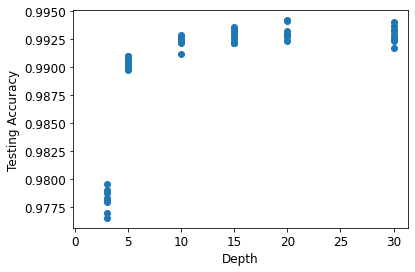

In [19]:
depths = []
test_accs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    test_accs.append(r['test_acc'])

plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')
plt.scatter(depths, test_accs)
plt.xlim(left=-0.2)
plt.show()

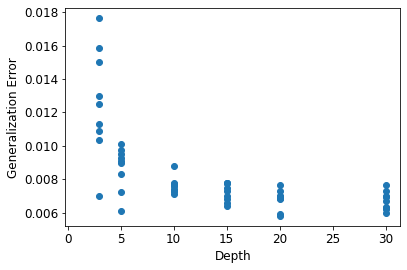

In [20]:
depths = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(abs(r['gen_error']))

plt.xlabel('Depth')
plt.ylabel('Generalization Error')
plt.scatter(depths, gen_errs)
plt.xlim(left=-0.2)
plt.show()

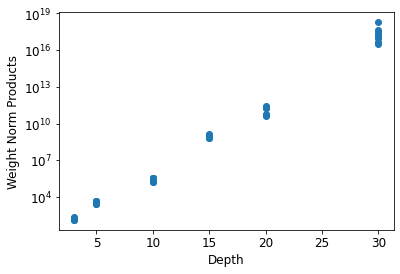

In [21]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth']) #r['config'].training_config.weight_decay)
    w_norm_prods.append(r['weight_norm_prod'])
    
plt.xlabel('Depth')
plt.ylabel('Weight Norm Products')
plt.yscale('log')
plt.scatter(depths, w_norm_prods)
plt.show()

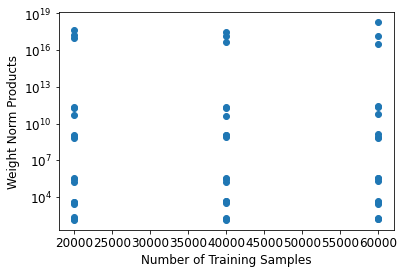

In [22]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['config'].dataset_config.config.num_train_samples)
    w_norm_prods.append(r['weight_norm_prod'])

plt.yscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Weight Norm Products')
plt.scatter(depths, w_norm_prods)
plt.show()

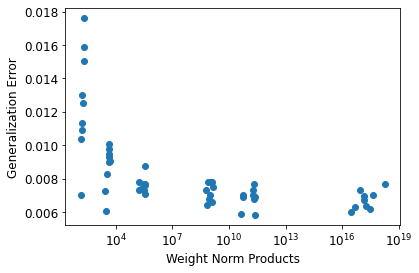

In [23]:
w_norm_prods = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    w_norm_prods.append(r['weight_norm_prod'])
    gen_errs.append(r['gen_error'])

plt.xscale('log')
plt.xlabel('Weight Norm Products')
plt.ylabel('Generalization Error')
plt.scatter(w_norm_prods, gen_errs)
plt.show()

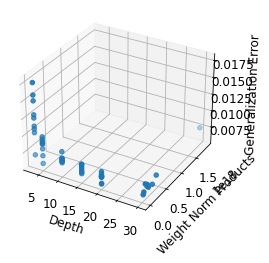

In [24]:
depths = []
gen_errs = []
w_norm_prods = []

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(r['gen_error'])
    w_norm_prods.append(r['weight_norm_prod'])
ax.set_xlabel('Depth')
ax.set_ylabel('Weight Norm Products')
ax.set_zlabel('Generalization Error')
#plt.xlim(left=-0.2)
ax.scatter(depths, w_norm_prods, gen_errs, marker='o')
plt.show()

In [27]:
manager._save_index()